In [123]:
import tensorflow as tf

g=tf.Graph()

with g.as_default():
    a=tf.placeholder(tf.float32,name="a")
    b=tf.placeholder(tf.float32,name="b")
    c=a+b

In [124]:
[node.name for node in g.as_graph_def().node]

['a', 'b', 'add']

In [125]:
g.as_graph_def().node[2].input

['a', 'b']

In [126]:
!pip install graphviz

In [127]:
from graphviz import Digraph


In [128]:
dot=Digraph()

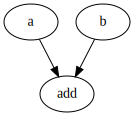

In [129]:
for n in g.as_graph_def().node:
    dot.node(n.name,label=n.name)
    for i in n.input:
        dot.edge(i,n.name)
    
dot

In [130]:
def tf_to_graph(g):
    dot=Digraph()
    for n in g.as_graph_def().node:
        dot.node(n.name,label=n.name)
        for i in n.input:
            dot.edge(i,n.name)
        
    return dot

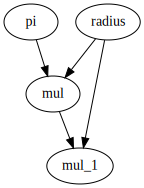

In [131]:
g=tf.Graph()

with g.as_default():
    pi=tf.constant(3.14,name="pi")
    r=tf.placeholder(tf.float32,name="radius")
    y=pi*r*r

tf_to_graph(g)

In [134]:
g = tf.Graph()

with g.as_default():
    X = tf.placeholder(tf.float32, name="X")
    
    with tf.name_scope("Layer1"):
        W1 = tf.placeholder(tf.float32, name="W1")
        b1 = tf.placeholder(tf.float32, name="b1")

        a1 = tf.nn.relu(tf.matmul(X, W1) + b1)
    
    with tf.name_scope("Layer2"):
        W2 = tf.placeholder(tf.float32, name="W2")
        b2 = tf.placeholder(tf.float32, name="b2")

        a2 = tf.nn.relu(tf.matmul(a1, W2) + b2)

    with tf.name_scope("Layer3"):
        W3 = tf.placeholder(tf.float32, name="W3")
        b3 = tf.placeholder(tf.float32, name="b3")

        y_hat = tf.matmul(a2, W3) + b3
    
tf.summary.FileWriter("logs", g).close()

In [135]:
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
# Simply call this to display the result. Unfortunately it doesn't save the output together with
# the Jupyter notebook, so we can only show a non-interactive image here.
show_graph(g)


In [136]:
tf.summary.FileWriter("logs", g).close()

In [ ]:
!tensorboard --logdir=logs

2018-04-03 06:55:09.557351: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2018-04-03 06:55:09.557878: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2018-04-03 06:55:09.557913: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2018-04-03 06:55:09.557941: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2018-04-03 06:55:09.557968: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't